### Selenium image screenshot

- youtube 영상을 캡처하여 원하는대로 캡처본을 잘라 저장하기

**0) Setting**

Install Pillow 
- 이미지를 컨트롤 하기위한 python 패키지인 Pillow를 설치 (pip3 install pillow)
- http://pillow.readthedocs.io/en/3.1.x/reference/Image.html

In [1]:
import time
from selenium import webdriver
from PIL import Image as pil

**1) Store image** : youtube 영상 열고 캡처하기

In [2]:
driver =  webdriver.Chrome() # 크롬 브라우져 실행
driver.get("https://www.youtube.com/watch?v=tXOJIBPwSyo&t=200s") # youtube 사이트로 이동
time.sleep(1) # 1초동안 대기
driver.save_screenshot('screenshot.png') # 캡처하기

True

**2) Show image** : 이미지에 대한 정보 보기

(2400, 1318)


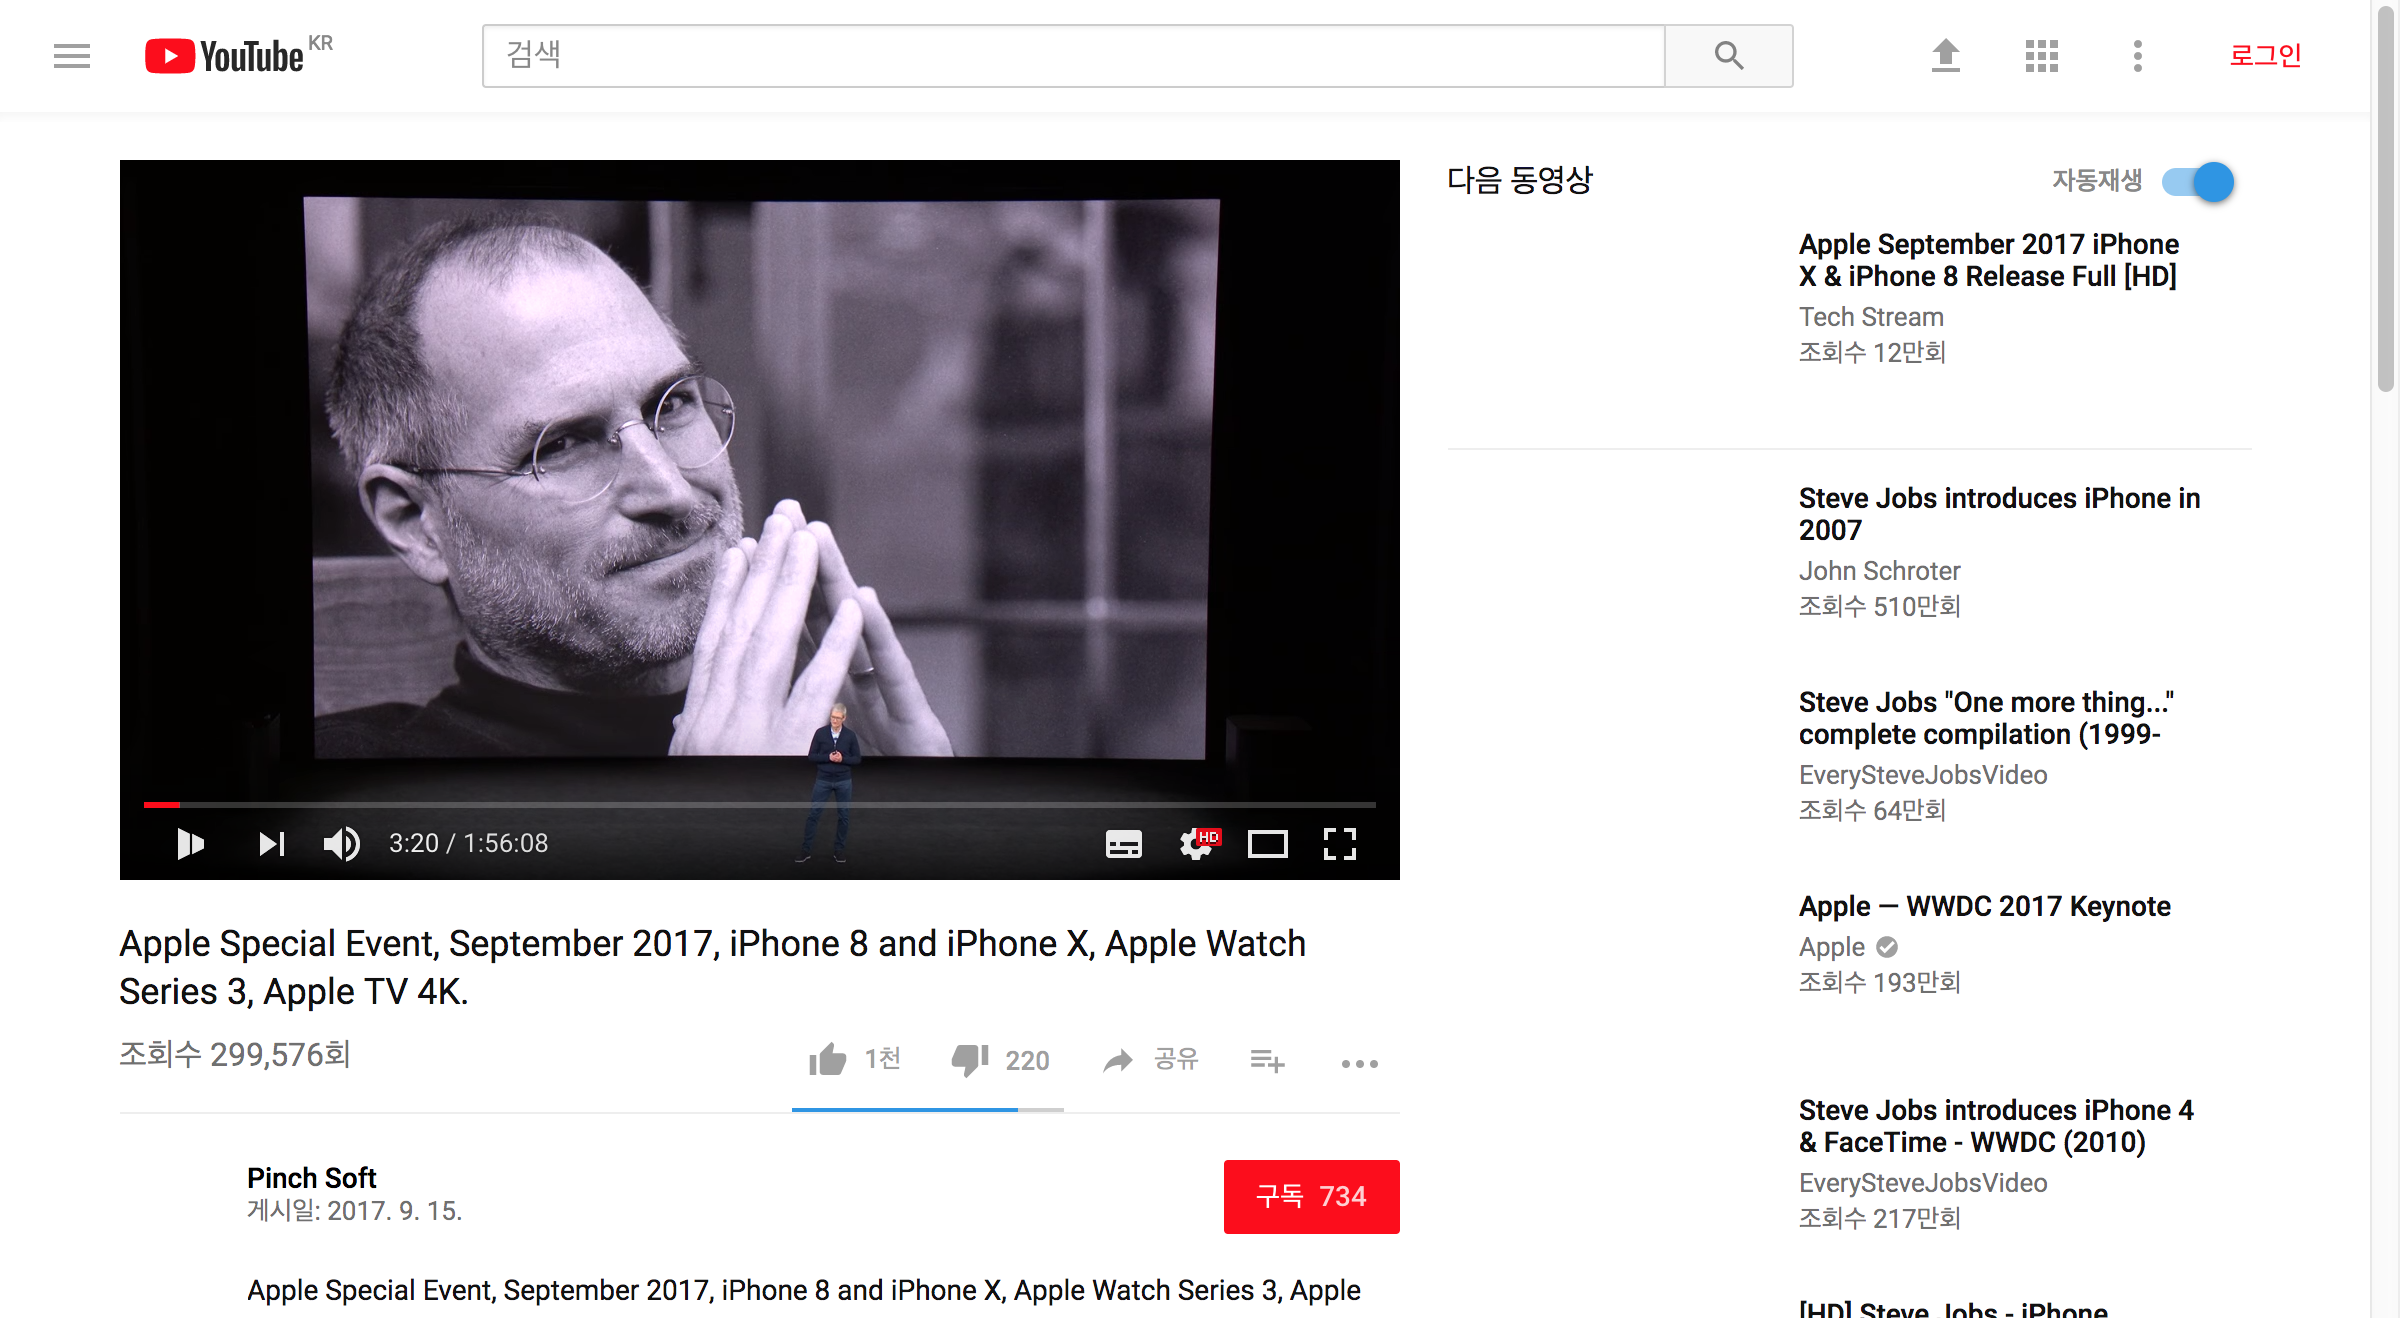

In [3]:
# 저장된 이미지 파일의 사이즈와 이미지를 pillow를 이용하여 확인
pil_im = pil.open('screenshot.png')
print(pil_im.size) # 가로, 세로 길이 출력
pil_im # 이미지 보여주기

**3) Change image size** : 이미지 크기 변환하기

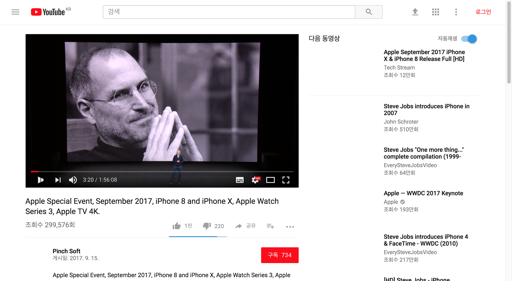

In [4]:
# pillow를 이용하여 512*512 사이즈로 이미지의 크기를 변환
pil_im.thumbnail((512, 512))
pil_im.save("screenshot_thumnail.png")
pil.open('screenshot_thumnail.png')

**4) select element image**

- 이미지의 특정 영역을 자름
- 모니터의 해상도에 따라 위치를 계산하는 방법이 차이남

(1) 특정 selector의 element의 위치와 사이즈 데이터를 확인

In [5]:
element = driver.find_element_by_css_selector('#movie_player') # 영상에 대한 selector 추출
location = element.location # 영상이 전체 화면에서 어떻게 위치해 있는지를 확인
size = element.size # 영상 화면 크기 출력
location, size

({'x': 60, 'y': 80}, {'height': 360, 'width': 640})

(2) 저장했던 원본 이미지를 열어 top, bottom, right, left의 위치를 계산

In [6]:
pil_im = pil.open('screenshot.png') # 원본 이미지를 불러오기

left = location['x'] * 2 # 레티나는 *2 해줘야 함
top = location['y'] * 2
right = left + size['width'] * 2
bottom = top + size['height'] * 2

area = (left, top, right, bottom)
area

(120, 160, 1400, 880)

(3) 이미지를 자르고 저장후에 저장된 이미지를 보여줌

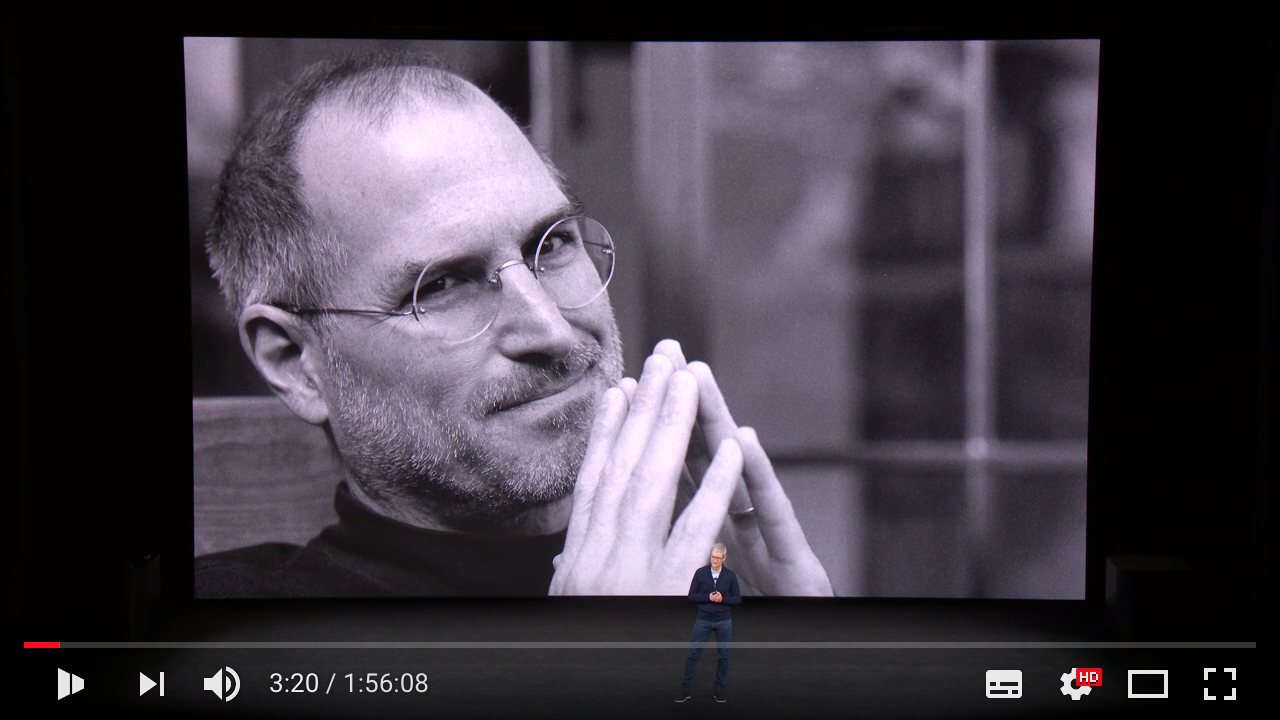

In [7]:
pil_im = pil_im.crop(area) # 이미지 자름
pil_im.save("screenshot_element.png") # 이미지 저장
pil.open('screenshot_element.png') # 이미지 열기

In [8]:
# 브라우져 닫기
driver.close()